Konrad Dryniewicz - S00160273.



## Numbers Dataset

We have a dataset of handwritten digits from 0 to 9

In [16]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image

In [17]:
##Loading in the digits, first we get the data into a file list, then into images array.
imgs = []
filelist = glob.glob('data/*/*')
filelist.sort()
X = np.array([np.array(Image.open(file)) for file in filelist])
a = [s.split() for s in ' '.join(filelist).split('\\') if s]
#Reshaping the arrays into two dimensional and one dimensional ones.
a = np.array(a[1::2])
a = np.array([b[0].astype(int) for b in a])

Y = a.reshape(5000,1)
x,y,z = X.shape

X = X.reshape(x,y * z)

X.shape


(5000, 400)

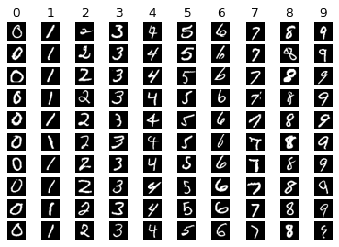

In [18]:
##Printing Examples
number_of_classes = 10
examples_per_class = 10
pos = 0
for cls in range(number_of_classes):
    idxs = range(pos,pos+500)
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(X[idx].reshape(20,20).astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(cls))
    pos = pos+500
plt.show()

In [19]:
##Naive Bayes
#First import the required libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Prepare the train and test variables
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state = 160273)

#Create the Gaussian Classifier
model = GaussianNB()

#Train the model using the train data
model.fit(X_train, np.ravel(y_train))

#Now lets print the score
print("Model Score: " + str(model.score(X_test, y_test)))
print(y_test.shape)

y_pred = model.predict(X_test)
print(accuracy_score(y_test , y_pred))

##Done a confusion matrix here just so I could make comparation between the NB and K-Nearest one.
#confusion_matrix(y_test, y_pred)

Model Score: 0.6448
(1250, 1)
0.6448


444


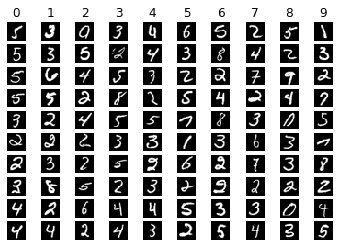

In [20]:
##Printing Examples for Misidentified Images
misidentified = []
for inc in range(y_test.shape[0]):
    if(y_pred[inc] != y_test[inc]):
        misidentified.append(X_test[inc])
print(len(misidentified))

number_of_classes = 10
examples_per_class = 10
pos = 0
for cls in range(number_of_classes):
    idxs = range(pos,pos+40)
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(misidentified[idx].reshape(20,20).astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(cls))
    pos = pos+40
plt.show()

#It seems to commonly misidentify the numbers most which are more rounded numbers.

In [21]:
##K-Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report


model_k = KNeighborsClassifier(n_neighbors=5)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y)
model_k.fit(Xtrain ,np.ravel(Ytrain))
print("Model Score: " + str(model_k.score(Xtest, Ytest)))


Model Score: 0.9464


In [22]:
Ypred = model_k.predict(Xtest)

conf_mat = confusion_matrix(Ytest, Ypred)
conf_mat

#Comments:
#1. So most misidentified class seems to be number "4" 
#2. So class number "1" seems to have most false positives

array([[123,   0,   0,   0,   0,   0,   1,   0,   1,   0],
       [  0, 114,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   5, 106,   0,   0,   0,   1,   3,   1,   0],
       [  0,   2,   0, 117,   0,   3,   0,   1,   0,   0],
       [  0,   2,   1,   0, 122,   0,   0,   0,   0,  10],
       [  0,   0,   0,   3,   0, 122,   2,   0,   1,   3],
       [  0,   0,   0,   0,   0,   0, 125,   0,   0,   0],
       [  0,   2,   0,   0,   1,   0,   0, 131,   0,   4],
       [  0,   2,   0,   2,   2,   3,   3,   0, 110,   1],
       [  0,   0,   0,   2,   3,   0,   1,   1,   0, 113]], dtype=int64)

In [23]:
values = []
for i in range(conf_mat.shape[0]): #Go through each array in row in confustion matrix
    max = np.argmax(conf_mat[i]) #Find max of the array
    val = np.sum(conf_mat[i]) - conf_mat[i][max] #sum the array and subtract the max
    values.append(val) #Add to the list
print(values) #print the values

[2, 0, 10, 6, 13, 9, 0, 7, 13, 7]


In [24]:
conf_matR = np.rot90(conf_mat) #Rotate the array by 90 degrees to make it easier to deal with
values = [] #Create the list
for i in range(conf_matR.shape[0]): #Go through each array in row in confustion matrix
    max = np.argmax(conf_matR[i]) #Find the max of the array
    val = np.sum(conf_matR[i]) - conf_matR[i][max] #sum the array and subtract the max
    values.append(val) #Add to the list
print(values) #Values are printed in reverse order, e.g. 9.. 8.. 7.. 1.. 0 etc.


[18, 3, 5, 8, 6, 6, 7, 1, 13, 0]


In [25]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

kf = KFold(n_splits=5)

x_val_scores = []

for d in range(1, 25):
    testmod = KNeighborsClassifier(n_neighbors=d)
    #testmod = PolynomialFeatures(degree=d, interaction_only=False)
   # X_non_test_poly = gen_poly_terms.fit_transform(X_non_test)
    validation_R_sqs = []
    for train_index, val_index in kf.split(X_train):
        X_c, X_val = X_train[train_index], X_train[val_index]
        y_c, y_val = y_train[train_index], y_train[val_index]

        testmod.fit(X_c, y_c.ravel())
        validation_R_sqs.append(testmod.score(X_val, y_val))
        
    print(np.mean(validation_R_sqs))
    x_val_scores.append(np.mean(validation_R_sqs))

best_score = x_val_scores[np.argmax(x_val_scores)]
print(str(np.argmax(x_val_scores)+1) + " is the best value of k with an accuracy score of " + str(best_score))

0.9413333333333334
0.9245333333333333
0.9367999999999999
0.9368000000000001
0.9357333333333333
0.9373333333333334
0.9346666666666668
0.9304
0.9282666666666666
0.9256
0.9266666666666667
0.9253333333333333
0.9261333333333335
0.9226666666666666
0.9208000000000001
0.9202666666666666
0.9181333333333332
0.9154666666666665
0.9141333333333334
0.9125333333333334
0.9117333333333333
0.9114666666666666
0.9101333333333332
0.9098666666666666
1 is the best value of k with an accuracy score of 0.9413333333333334


## Conclusion

<b> Which model would you use and why?</b>
1. K-Nearest Neighbours is the model I'd use because it has a better accuracy score than NB and far less false positives.

<b>Are there any advantages to the poorer performing model?</b>

2. NB has an advantage of being faster to implement and requires less training data.